In [1]:
import os
import pandas as pd

def find_abnormal():
    folder_path = "./data_IR"
    #遍历所有的xlsx文件
    for filename in os.listdir(folder_path):
        if filename.endswith("xlsx"):
            file_path = os.path.join(folder_path,filename)
            # 读取xlsx文件
            df = pd.read_excel(file_path)
            #选取每个文件除了第一列和第一行的值
            df = df.iloc[1:,1:]
            for index, row in df.iterrows():
                for column in df.columns:
                    data = df.at[index, column]
                    # 在这里对每个数据点进行操作,首先里面所有的值都是str类型，我们尝试将其转成float，如果可以那就是float，如果无法转换我们就打印输出
                    try:
                        data = float(data)
                    except:
                        pass
                    # .是默认没有值，所以也要排除在外
                    if type(data) != float and data != '.':
                        print(data)


<1
<1
<1
<1
<1
<1
<1
<1
<0.01
<0.01
<0.01
<0.01
<0.01
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.05
<0.01
<0.01
<0.01
<0.01
<0.01
<0.01
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<1
<1 
 <1  
<1  
<1
<1
<1
<1
<1
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
<0.5
>0.001
>0.001
>0.001
>0.001


In [10]:
import os
import pandas as pd
def clean():
    folder_path = "./data_IR"
    #遍历所有的xlsx文件
    for filename in os.listdir(folder_path):
        if filename.endswith("xlsx"):
            file_path = os.path.join(folder_path,filename)
            # 读取xlsx文件
            df = pd.read_excel(file_path)

            #删除第一列和第一行的空格
            df[df.columns[0]] = df[df.columns[0]].apply(lambda x:x.replace(" ","") if isinstance(x,str) else x)
            df.columns = df.columns.to_series().apply(lambda x:x.replace(" ","") if isinstance(x,str) else x)
            #创建一个新frame  只包含第一列和那些不以Unnamed列开头的列    这里第一列要单独拿出来加上去，因为第一列就是空值
            df = df[df.columns[0]].to_frame().join(df.loc[:,~df.columns.str.startswith("Unnamed")])

            df.rename(columns={df.columns[0]:""},inplace=True)
            #写入excel 且不保留索引列
            df.to_excel(file_path,index=False)

def trans():
    folder_path = "./data_IR"
    #遍历所有的xlsx文件
    #输出文件目录
    out_path = os.path.join(os.getcwd(), 'output/resultIR.xlsx')
    #定义好输出的数据
    data = pd.DataFrame(columns=['Year', 'Crop_Type', 'Crop', 'Fungicide', 'Hectares', 'Active_Substance'])

    # 定义两个分别存放ha和ac的data,因为列名存在差异，所以必须先分开再合并
    data1 = []
    data2 = []
    for filename in os.listdir(folder_path):
        if filename.endswith("xlsx"):
            parts = filename.split("_")
            #获取各项列名内容
            year = parts[-2]
            Crop_Type = '_'.join(parts[0:-2])
            table_type = parts[-1].split(".")[0]
            #读取每个文件
            df = pd.read_excel(os.path.join(folder_path, filename), header=0, index_col=0)

            for index in df.index:
                for column in df.columns:
                    if pd.notna(df.loc[index,column]):
                        value = str(df.loc[index,column])
                        #只对<1的进行了处理，<0.01的都赋值为0.0  >0.01为了图方便也设置为了0.0
                        value = value.strip().split(".")[0].replace("<","0.")
                        try:
                            value = float(value)
                        except:
                            value = 0.0
                        
                        if table_type == "ac":
                            #每一列都是农作物  每一行都是杀虫剂
                            data1.append([year,Crop_Type,column,index,value])
                        if table_type == "ha":
                            #每一列都是农作物  每一行都是杀虫剂
                            data2.append([year,Crop_Type,column,index,value])
                    
    
    
    df_data1 = pd.DataFrame(data1,columns=['Year', 'Crop_Type', 'Crop', 'Fungicide', 'Active_Substance'])
    df_data2 = pd.DataFrame(data2,columns=['Year', 'Crop_Type', 'Crop', 'Fungicide', 'Hectares']) 
    df_data = pd.merge(df_data1, df_data2, how='inner', on=['Year', 'Crop_Type', 'Crop', 'Fungicide'])
    df_data.to_excel(out_path,index=False)

clean()
trans()


In [18]:
import pandas as pd

df=pd.read_excel("output/resultIR.xlsx")

print(f'删除前的数据数量：{len(df)}')
#先统一综合基数的名称
df.loc[df["Fungicide"].str.contains("other Fungicide",case=False),'Fungicide'] = "Other Fungicide"
df.loc[df["Fungicide"].str.contains("all Fungicide",case=False),'Fungicide'] = "all Fungicide"
df.loc[df['Fungicide'].str.contains('otherFungicide', case=False), 'Fungicide'] = 'Other Fungicide'
df.loc[df['Fungicide'].str.contains('allFungicide', case=False), 'Fungicide'] = 'all Fungicide'


#得到不存在综合基数的行列
df = df[~df["Fungicide"].str.contains("Other Fungicide|all Fungicide",case=False)]
#也可以不统一名称，但是需要都写下来
df = df[~df['Crop'].str.contains('Allcrops|Allcrops\\(spha\\)|Allcrops\\(kg\\)|Totalquantity\\(kg\\)|Totalarea\\(spha\\)|Totalquantity|Totalarea', case=False, regex=True)]


print(f'删除后的数据数量：{len(df)}')

删除前的数据数量：12917
删除后的数据数量：12917


In [19]:
#df["Crop_Type"].unique()
#统一数据
df.loc[df["Crop_Type"].str.contains("Arable",case=False),'Crop_Type'] = "Arable_crops"
df.loc[df["Crop_Type"].str.contains("Grassland",case=False),'Crop_Type'] = "Grassland_fodder_crops"
df.loc[df["Crop_Type"].str.contains("Soft",case=False),'Crop_Type'] = "Soft_fruit_crops"
df.loc[df["Crop_Type"].str.contains("Top",case=False),'Crop_Type'] = "Top_fruit_crops"
df.loc[df['Crop_Type'].str.contains('vegetable', case=False), 'Crop_Type'] = 'Outdoor_vegetable_crops'
df['Crop_Type'].unique()
#print(df.head())
df.to_excel("output/resultIR.xlsx",index=False)

In [20]:
#按照农作物来进行分类
for i in df['Crop_Type'].unique():
    data = df[df["Crop_Type"]==i].to_excel(f"tmpdata/{i}.xlsx",index=False)

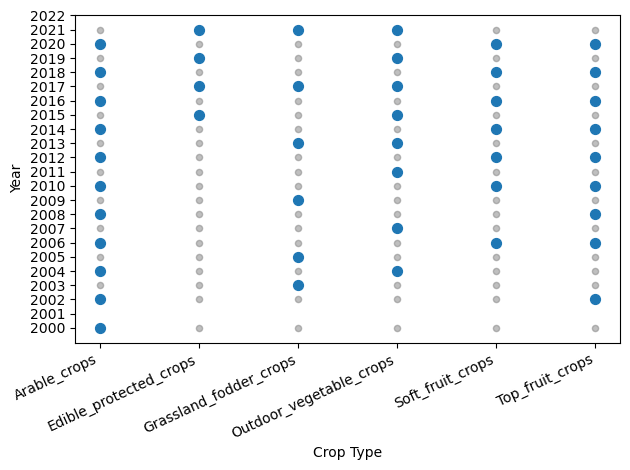

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_excel("output/resultIR.xlsx")
#获取横纵坐标需要的
years = df.iloc[:,0].drop_duplicates().values
Crop_Type = df.iloc[:,1].drop_duplicates().values
# 设置x y坐标

x = []
y = []

for year in years:
    for type in Crop_Type:
        if not df[(df.iloc[:,0]==year) & (df.iloc[:,1]==type)].empty:
            x.append(type)
            y.append(year)


#设置总的图
all_combinations = [(type,year) for type in Crop_Type for year in years]
#设置没点的图

for combinaton in all_combinations:
    if combinaton not in zip(x,y):
        plt.scatter(combinaton[0], combinaton[1], color='gray', alpha=0.5, s=20)

plt.scatter(x,y,s=50)

plt.xlabel('Crop Type')
plt.ylabel('Year')
plt.yticks(range(2000, 2023))
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.savefig('output/Year_Crop Type.png', dpi=1000)
plt.show()


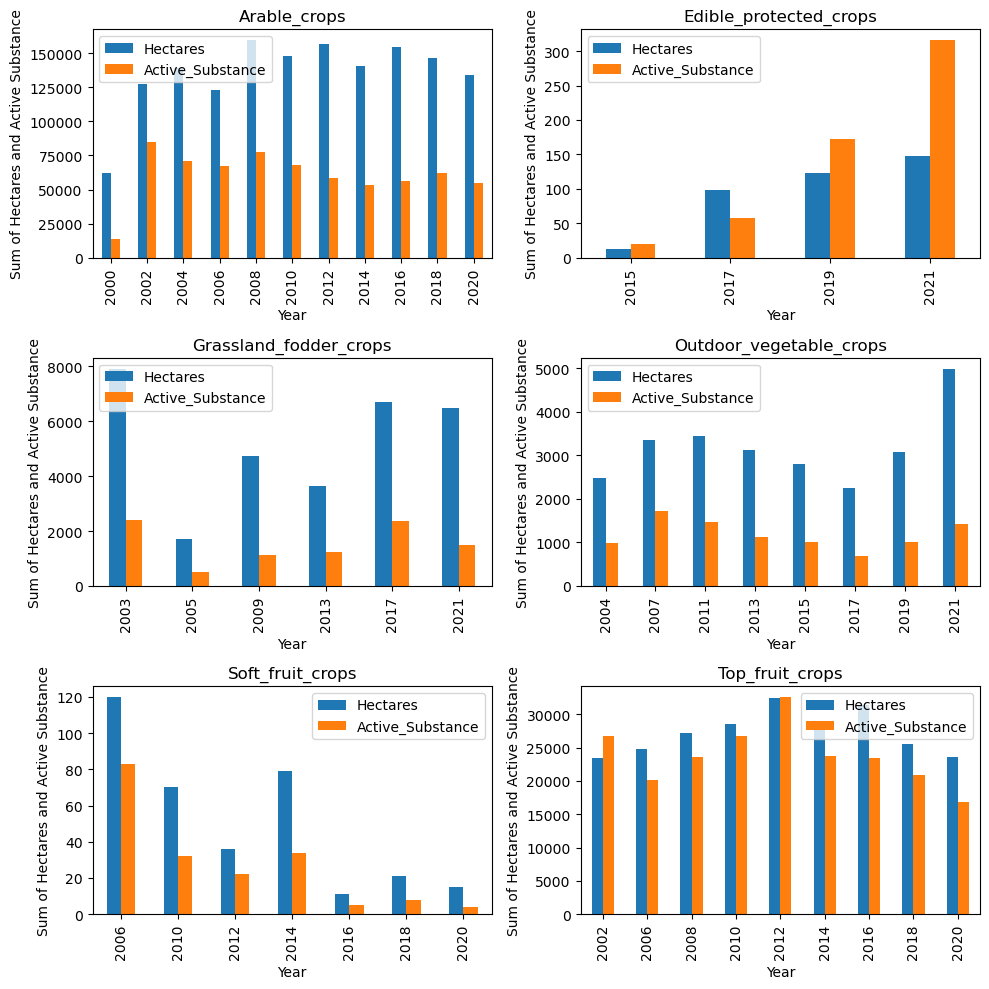

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt


#一共6种植物，画一个3*2的网格来存放这几张图
#这段代码使用 Matplotlib 创建了一个包含 3 行 2 列的子图网格，并设置了整个图形的大小为 10x10 英寸。
#fig 是一个 Figure 对象，代表整个图形。
#axs 是一个包含子图对象的二维数组。在这个例子中，axs 包含了 3 行 2 列的子图对象。
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))

# 对于每个作物进行操作，遍历的对象可以不在总表上遍历，而是从分表上遍历
#enumerate 获取索引值 如果想要索引值  这就是固定写法
for i,filename in enumerate(os.listdir("tmpdata")):
    if filename.endswith("xlsx"):
        df = pd.read_excel(os.path.join("tmpdata",filename))
        #使用 groupby 方法对df 按照 'Year' 列进行分组，使用 agg 方法对每个分组进行聚合， 'Hectares' 和 'Active Substance' 列的总和。
        # 将子图索引 i 转换为网格索引 row 和 col。这样可以确定在网格中的正确位置，以便在每个子图上绘制数据。

        group_data = df.groupby("Year").agg({"Hectares":"sum","Active_Substance":"sum"})

        row = i //2
        col = i%2
        ax = axs[row,col]
        group_data.plot(kind="bar",ax=ax)
        ax.set_xlabel('Year')
        ax.set_ylabel('Sum of Hectares and Active Substance')
        plot_title = filename.rsplit('.', 1)[0]
        ax.set_title(plot_title)

        ax.legend()

plt.tight_layout()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'subplot_IR.png')
plt.savefig(plot_filename,  dpi=1000)

plt.show()

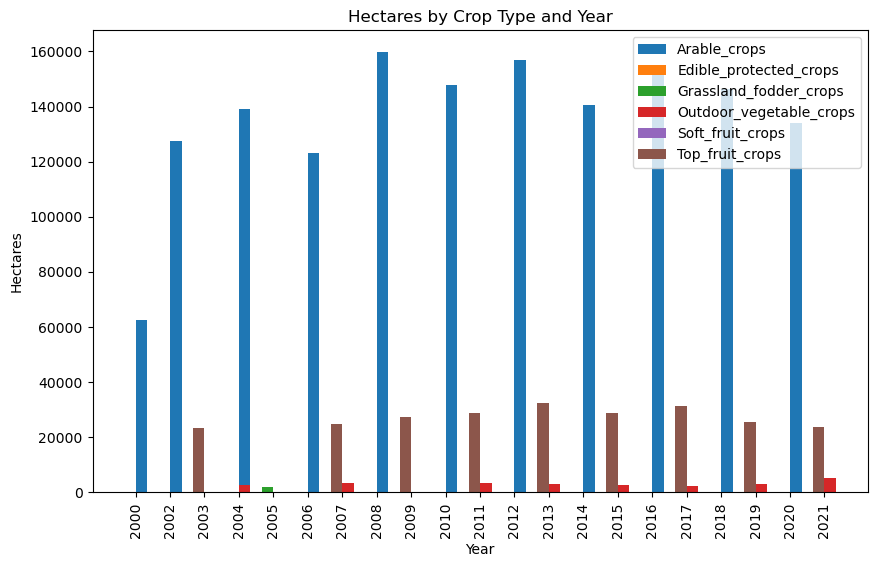

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("output/resultIR.xlsx")

group_data = df.groupby(["Year","Crop_Type"]).agg({'Hectares': 'sum'})
#这里得到的是“不正常的”excel，因为matplotlib解析不了，需要转换一下,即类似于：
# 2000 Arable_crops             62382.0
# 2002 Arable_crops            127351.0
#      Top_fruit_crops          23451.0
# 2003 Grassland_fodder_crops    7925.0
# 2004 Arable_crops            139002.0
#创建一个透视表,英文翻译为旋转表
pivoted_data = group_data.pivot_table(index="Year",columns="Crop_Type",values="Hectares")

#这句话的作用是要让图画的好看，往右移动一格
pivoted_data.iloc[:, 0:2] = pivoted_data.iloc[:, 0:2].shift(periods=1, axis=0)

fix,ax = plt.subplots(figsize=(10,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pivoted_data.plot(kind='bar', ax=ax, width=2, color=colors)
# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Hectares')
ax.set_title('Hectares by Crop Type and Year')

# Add a legend to the plot
ax.legend()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'hectares_IR.png')
plt.savefig(plot_filename)

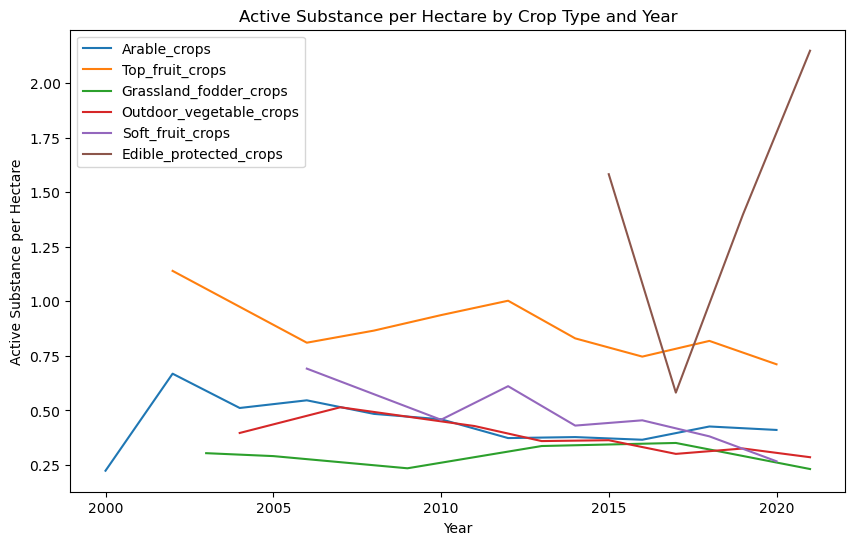

In [55]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("output/resultIR.xlsx")
group_data = df.groupby(["Year","Crop_Type"]).agg({'Hectares': 'sum', 'Active_Substance': 'sum'})
#计算密度
group_data["Active_Substance_per_Hectare"] = group_data["Active_Substance"]/group_data["Hectares"]
#旋转成合适的能画的excel表
group_data = group_data.reset_index()

fig,ax = plt.subplots(figsize=(10,6))
#hue="Crop_Type" 根据 "Crop_Type" 列的值对折线进行分组，并使用不同的颜色进行区分。
sns.lineplot(data=group_data,x="Year",y="Active_Substance_per_Hectare",hue="Crop_Type",ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Active Substance per Hectare')
ax.set_title('Active Substance per Hectare by Crop Type and Year')

# Add a legend to the plot
ax.legend()

# Save the plot to a file
plot_filename = os.path.join('output_plots', 'active_substance_per_hectare_IR.png')
plt.savefig(plot_filename)

plt.show()

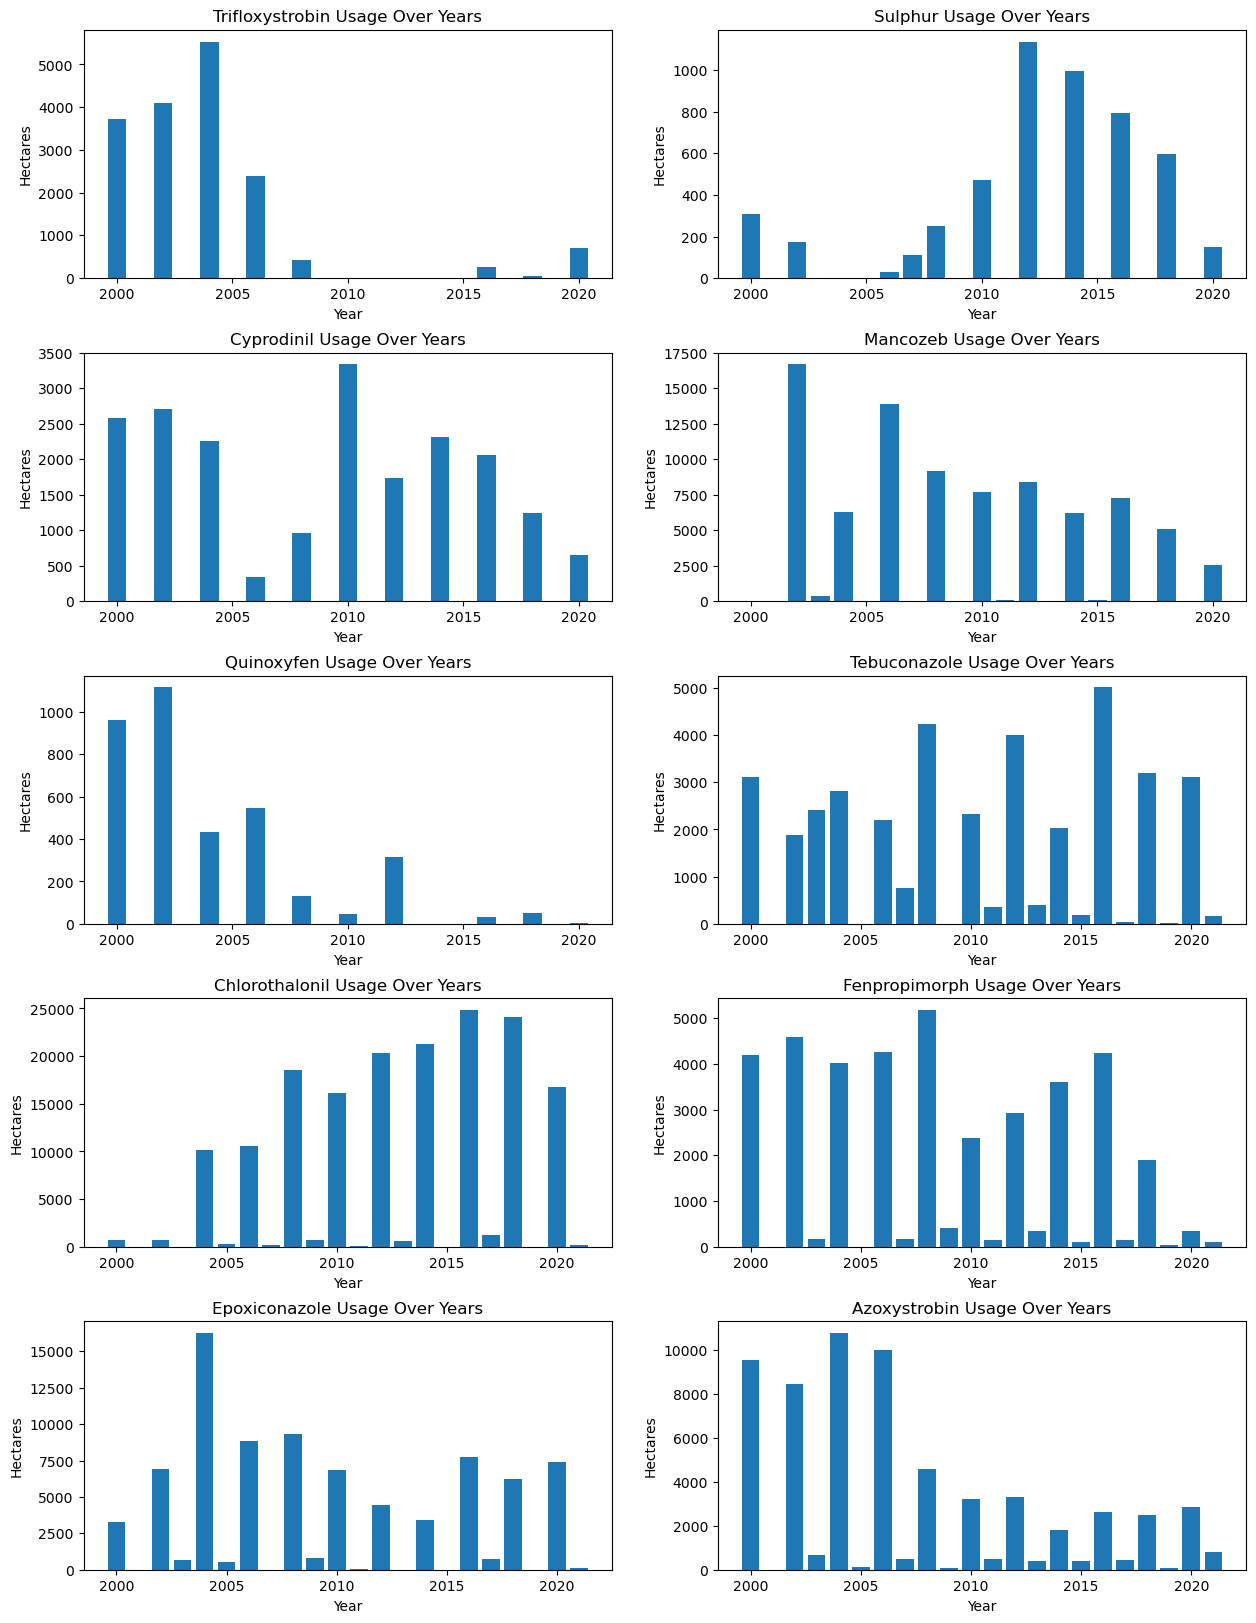

In [64]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("output/resultIR.xlsx")
#找出每个杀菌剂对应的最小和最大年份
min_year = df.groupby("Fungicide")["Year"].min()
max_year = df.groupby("Fungicide")["Year"].max()
# 组装成一起
result = pd.concat([min_year,max_year],axis=1)
result.columns = ["First_year","Last_year"]
result["year_range"] = result["Last_year"]- result["First_year"] 
#排序
result.sort_values(by="year_range", inplace=True)
result.to_excel("output/year_range.xlsx")
#找出最大的10个
top_10 = result.tail(10)
top_10_fungicides = top_10.index.tolist()
# 获取top_10_df
top_10_df = df[df["Fungicide"].isin(top_10_fungicides)]
top_10_df = top_10_df.groupby(["Year","Fungicide"]).agg({"Hectares": "sum"})
top_10_df.reset_index(inplace=True)
top_10_df = top_10_df.pivot(index="Year", columns="Fungicide", values="Hectares")


#绘图
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)
for i,fungicide in enumerate(top_10_fungicides):
    row = i // 2
    col = i % 2

    fungicide_df = top_10_df[fungicide]
    axs[row, col].bar(fungicide_df.index, fungicide_df.values)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Hectares')
    axs[row, col].set_title(f'{fungicide} Usage Over Years')
    axs[row, col].tick_params(axis='x')

    plot_filename = os.path.join('output_plots', 'top10.png')
    plt.savefig(plot_filename, dpi=1000)
plt.show()



Year
2000    42
2002    56
2004    51
2006    55
2008    60
Name: Fungicide, dtype: int64
Year
2015     7
2017    12
2019    14
2021    11
Name: Fungicide, dtype: int64
Year
2003    12
2005     7
2009    16
2013    19
2017    22
Name: Fungicide, dtype: int64
Year
2004    22
2007    19
2011    22
2013    24
2015    21
Name: Fungicide, dtype: int64
Year
2006    19
2010    18
2012    21
2014    21
2016    11
Name: Fungicide, dtype: int64
Year
2002    19
2006    16
2008    20
2010    19
2012    18
Name: Fungicide, dtype: int64


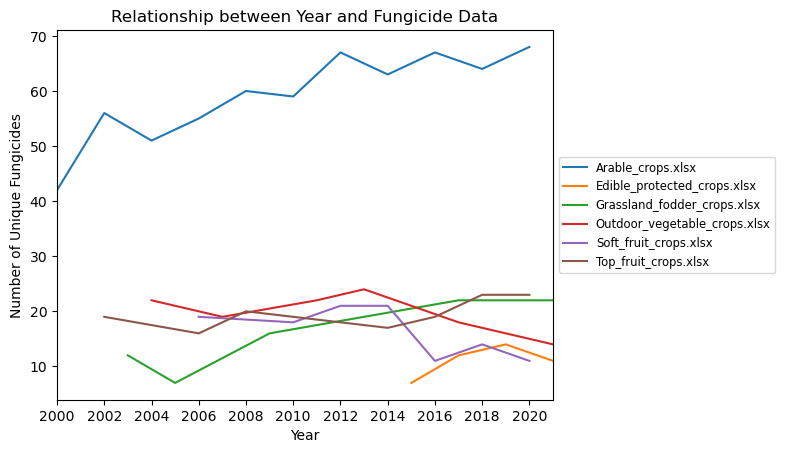

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt


for filename in os.listdir("tmpdata"):
    if filename.endswith("xlsx"):
        df = pd.read_excel(os.path.join("tmpdata",filename))
        #Year改为int类型  方便后面画图的时候进行+2递增
        df['Year'] = df['Year'].astype(int)
        # 以年分组，得到每个杀虫剂的数量。
        df = df.groupby("Year")["Fungicide"].nunique()
        df.plot(kind='line', label=filename)
plt.xlabel('Year')
plt.ylabel('Number of Unique Fungicides')
plt.title('Relationship between Year and Fungicide Data')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
plt.savefig('output_plots/relationship_between_year_and_fungicide_data.png', dpi=1000, bbox_inches='tight')
plt.show()